In [2]:
import matplotlib.pyplot as plt
import numpy as np

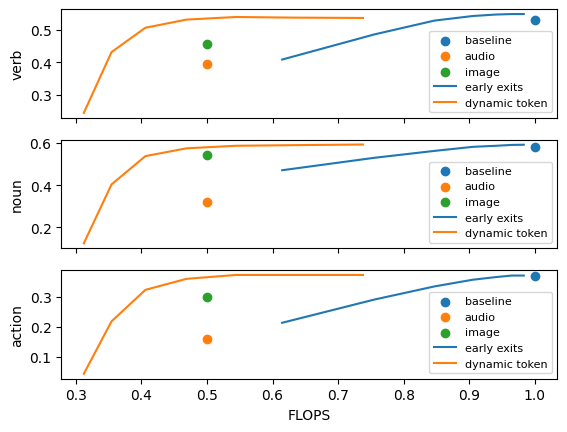

In [14]:
# dynamic token
fig, axs = plt.subplots(3, sharex=True)
mbt = [0.53, 0.58, 0.37]
for i in range(3):
    axs[i].scatter(1, mbt[i], label='baseline')

audio = [0.395, 0.322, 0.160]
for i in range(3):
    axs[i].scatter(0.5, audio[i], label='audio')

image = [0.458, 0.543, 0.30]
for i in range(3):
    axs[i].scatter(0.5, image[i], label='image')

early_exits = [
    [0.40908291, 0.48635804, 0.52895617, 0.543, 0.5476, 0.549, 0.549], [0.47121986, 0.53001232, 0.56275304, 0.582, 0.587, 0.591, 0.592], [0.21334272135187468, 0.29132195036085196, 0.33550431262101743, 0.358, 0.367, 0.372, 0.372]    
]
computation = [0.6146365076571049, 0.7552074165346487, 0.847019304113126, 0.9055183946488292, 0.9411781963269377, 0.9648389368068997, 0.9832922607522143]
for i in range(3):
    axs[i].plot(computation, early_exits[i], label='early exits')


verb = [0.537, 0.538, 0.54, 0.532, 0.507, 0.432, 0.245]
noun = [0.593, 0.590, 0.587, 0.575, 0.538, 0.404, 0.125]
action = [0.374, 0.374, 0.374, 0.361, 0.324, 0.218, 0.042]
dynamic_token = [verb, noun, action]

ratio = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]
computation = [(1 + r + r**2 + r**3)/4 for r in ratio]

for i in range(3):
    axs[i].plot(computation, dynamic_token[i], label='dynamic token')
                
name = ['verb', 'noun', 'action']
for i in range(3):
    axs[i].set_ylabel(name[i])
    axs[i].legend(loc='lower right', fontsize=8)
plt.xlabel('FLOPS')
plt.show()

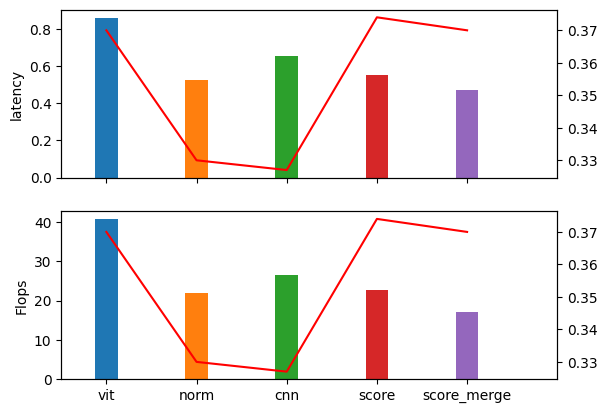

In [12]:
# benchmark for latency on Jetson Nano, FLOPS is measured on 3090 (not possible for nano)
factors = ['latency', 'Flops']
name = ['vit', 'norm', 'cnn', 'score', 'score_merge'] 
acc = [0.37,  0.33, 0.327, 0.374, 0.37,]
vit = [0.86, 40.7]
score_predictor = [0.55, 22.8]
token_merge = [0.47, 17.14]
norm = [0.525, 21.96]
cnn = [0.656, 26.5]
data = [vit, norm, cnn, score_predictor, token_merge, ]
fig, axs = plt.subplots(2, sharex=True)
for i in range(2):
    for j, factor in enumerate(data):
        if i < len(factor):
            axs[i].bar(j, factor[i], label=name[j], width=0.25)
   
    axs[i].set_ylabel(factors[i])
    axs[i].set_xlim(-0.5, 5)
    axs[i].twinx().plot(range(len(name)), acc, c='r')
axs[0].set_xticks([])
axs[1].set_xticks(range(len(name)), name)
plt.show()